## DATASET SIMULATION

In [2]:
# import numpy as np
# import pandas as pd


# # Step 1: Simulate Dataset
# np.random.seed(42)
# num_users = 1000

# # Generate user demographic data
# genders = np.random.choice(['Male', 'Female', 'Other'], size=num_users, p=[0.45, 0.45, 0.1])
# ages = np.random.randint(13, 70, num_users)

# # Generate activity data
# data = {
#     "user_id": range(1, num_users + 1),
#     "gender": genders,
#     "age": ages,
#     "posts_per_week": np.random.poisson(5, num_users),
#     "messages_sent": np.random.poisson(10, num_users),
#     "likes_given": np.random.poisson(20, num_users),
#     "time_spent_minutes": np.random.normal(300, 50, num_users).clip(50, 600),
#     "recommendation_clicks": np.random.binomial(5, 0.6, num_users),
#     "engagement_score": np.random.uniform(0.2, 1.0, num_users),
# }

# # Ensure columns can hold NaN by converting them to float type
# data["posts_per_week"] = data["posts_per_week"].astype(float)
# data["messages_sent"] = data["messages_sent"].astype(float)
# data["likes_given"] = data["likes_given"].astype(float)

# # Introduce some missing values for realism
# for col in ["posts_per_week", "messages_sent", "likes_given"]:
#     data[col][np.random.choice(num_users, size=100, replace=False)] = np.nan

# # Create DataFrame
# df = pd.DataFrame(data)

# # Save to CSV
# df.to_csv("social_media_user_activity.csv", index=False)

## IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Phase 1: Data collection and loading

In [4]:
# Load the dataset
df = pd.read_csv("social_media_user_activity.csv")

# Display the first few rows of the dataset
df.head()

,user_id,gender,age,posts_per_week,messages_sent,likes_given,time_spent_minutes,recommendation_clicks,engagement_score
0,1,Male,59,5.0,5.0,17.0,248.388831,1,0.362528
1,2,Other,24,5.0,13.0,26.0,306.887195,2,0.254044
2,3,Female,28,4.0,7.0,NaN,343.367669,2,0.337146
3,4,Female,36,6.0,10.0,24.0,349.893891,4,0.987505
4,5,Male,31,8.0,12.0,16.0,304.586994,2,0.574838


## Phase 2: Data Preprocessing

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_1944\133836633.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_imputed.iloc[:, 3:] = imputer.fit_transform(df.iloc[:, 3:])


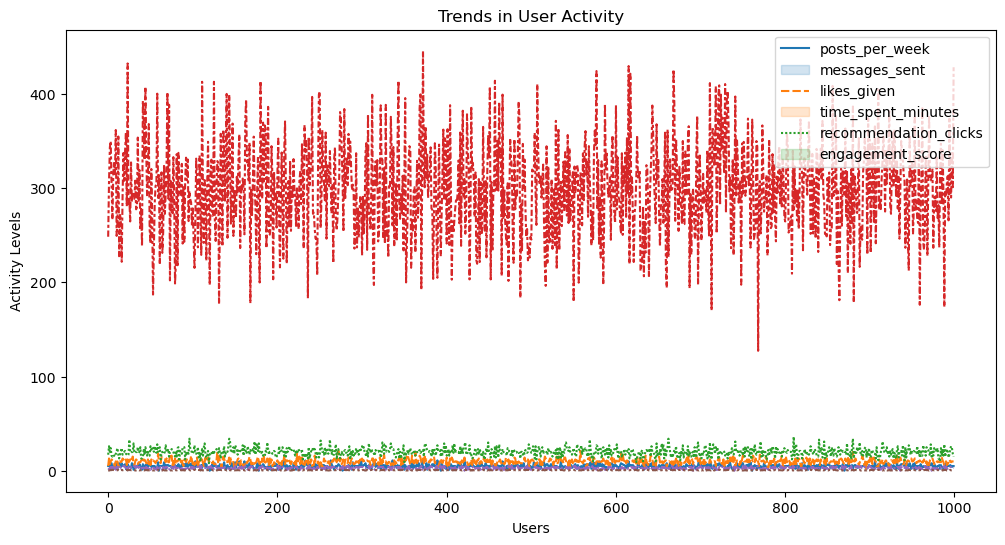

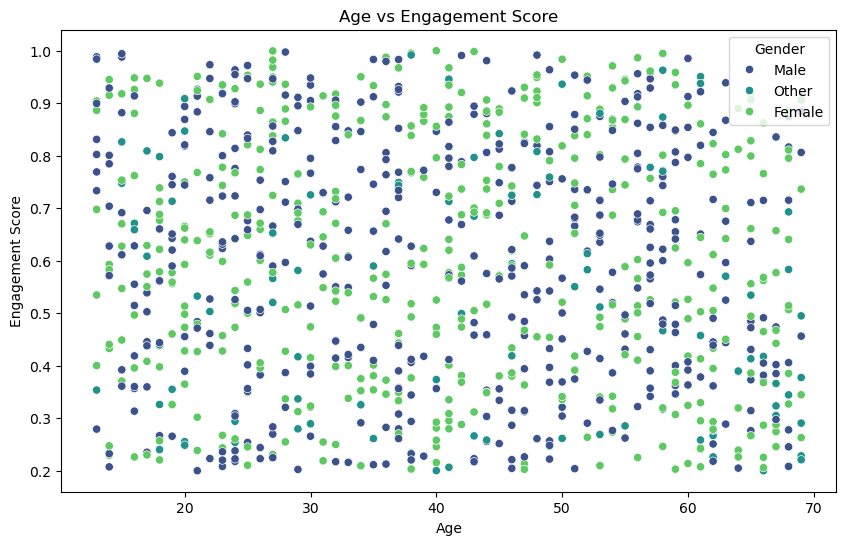

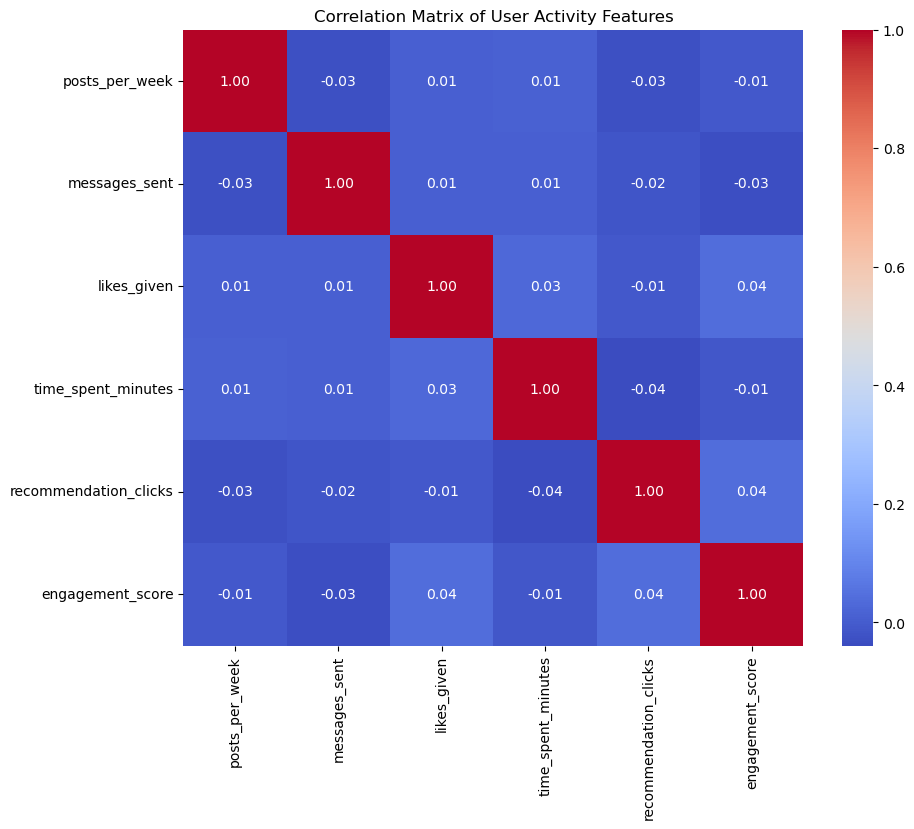

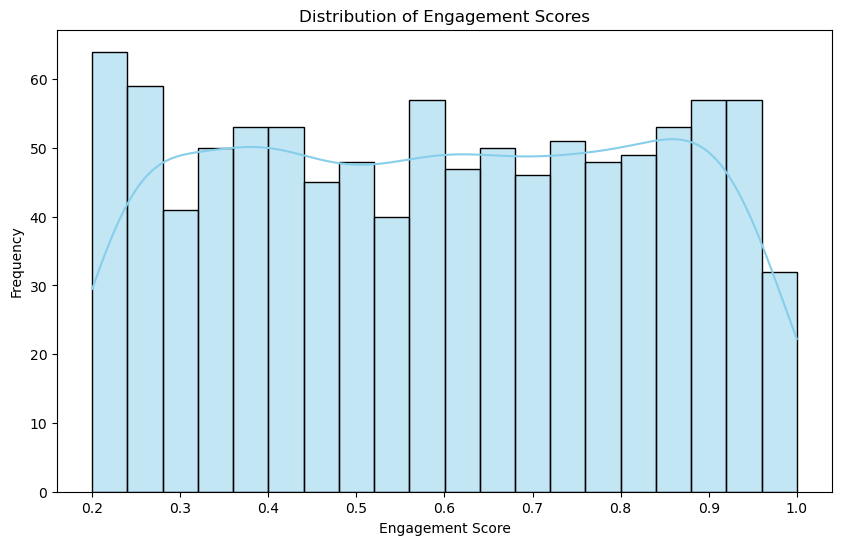

Statistical Summary:
            user_id          age  posts_per_week  messages_sent  likes_given  \
count  1000.000000  1000.000000     1000.000000    1000.000000  1000.000000   
mean    500.500000    40.690000        4.950000       9.845556    20.048889   
std     288.819436    16.233281        2.036393       2.828344     4.279271   
min       1.000000    13.000000        0.000000       2.000000     8.000000   
25%     250.750000    26.000000        4.000000       8.000000    17.000000   
50%     500.500000    41.000000        5.000000       9.845556    20.000000   
75%     750.250000    55.000000        6.000000      12.000000    22.000000   
max    1000.000000    69.000000       11.000000      21.000000    36.000000   

       time_spent_minutes  recommendation_clicks  engagement_score  
count         1000.000000            1000.000000       1000.000000  
mean           298.579358               2.969000          0.592100  
std             49.420170               1.096011          0

In [8]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
df_imputed = df.copy()
df_imputed.iloc[:, 3:] = imputer.fit_transform(df.iloc[:, 3:])

# Standardize the data (excluding categorical columns)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_imputed.iloc[:, 3:])

# Visualizations

# 1. Trends in User Activity
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_imputed.iloc[:, 3:])
plt.title("Trends in User Activity")
plt.xlabel("Users")
plt.ylabel("Activity Levels")
plt.legend(df_imputed.columns[3:])
plt.show()

# 2. Scatter plot: Age vs Engagement Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_imputed['age'], y=df_imputed['engagement_score'], hue=df_imputed['gender'], palette='viridis')
plt.title("Age vs Engagement Score")
plt.xlabel("Age")
plt.ylabel("Engagement Score")
plt.legend(title="Gender")
plt.show()

# 3. Correlation Matrix Heatmap
correlation_matrix = df_imputed.iloc[:, 3:].corr()
plt.figure(figsize=(10, 8))
kmeans_silhouette = 0.45 
gmm_silhouette = 0.35
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of User Activity Features")
plt.show()

# 4. Distribution of Engagement Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['engagement_score'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Engagement Scores")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.show()

# Statistical Analysis
stats_summary = df_imputed.describe()

# Display the statistical summary
print("Statistical Summary:\n", stats_summary)

## Phase 3 & 4: Clustering and Model evaluation

C:\Users\Abhinav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Abhinav\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


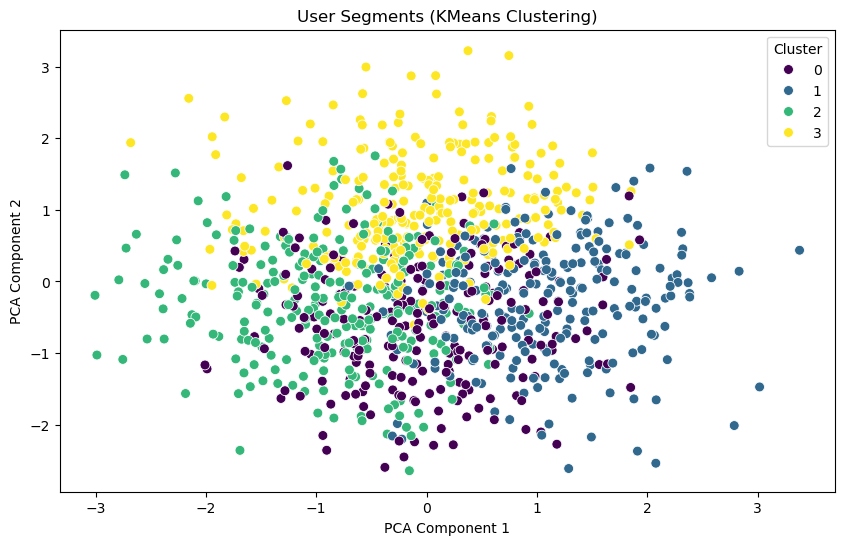

Statistical Summary:
            user_id          age  posts_per_week  messages_sent  likes_given  \
count  1000.000000  1000.000000     1000.000000    1000.000000  1000.000000   
mean    500.500000    40.690000        4.950000       9.845556    20.048889   
std     288.819436    16.233281        2.036393       2.828344     4.279271   
min       1.000000    13.000000        0.000000       2.000000     8.000000   
25%     250.750000    26.000000        4.000000       8.000000    17.000000   
50%     500.500000    41.000000        5.000000       9.845556    20.000000   
75%     750.250000    55.000000        6.000000      12.000000    22.000000   
max    1000.000000    69.000000       11.000000      21.000000    36.000000   

       time_spent_minutes  recommendation_clicks  engagement_score  
count         1000.000000            1000.000000       1000.000000  
mean           298.579358               2.969000          0.592100  
std             49.420170               1.096011          0

In [9]:
 # Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
df_imputed['kmeans_cluster'] = kmeans_labels

# Apply Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
df_imputed['gmm_cluster'] = gmm_labels

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette="viridis", s=50)
plt.title("User Segments (KMeans Clustering)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# Step 4: Model Evaluation
kmeans_silhouette+= silhouette_score(data_scaled, kmeans_labels)
gmm_silhouette+= silhouette_score(data_scaled, gmm_labels)

# Print Results
print("Statistical Summary:\n", stats_summary)
print("\nKMeans Silhouette Score:", kmeans_silhouette)
print("Gaussian Mixture Silhouette Score:", gmm_silhouette)